## Free fall with air resistance

In [1]:
import matplotlib.pyplot as plt
import numpy as np

First we need to declare the constant values we will need

#### Constants

In [2]:
g = -9.81

And now the initial conditions, where we can specify the height from which we are dropping the object, the initial vertical speed (0 if the object is simply dropped), and the time at which this happens

In [3]:
def air_drag(aero_coefficient, front_surface, air_density, velocity):
    drag = (0.5 * aero_coefficient * front_surface * air_density * velocity**2) * (-np.sign(velocity))
    return(drag)

#### Initial conditions

In [4]:
height_0 = 2000
v_y_0 = 0
time_0 = 0

#### Test variables

In [5]:
air_density = 1.2
mass_1 = 1
mass_2 = 2
aero_coefficient_1 = 0.8
aero_coefficient_2 = 0.8
front_surface_1 = 0.01
front_surface_2 = 0.01

We initialize the lists in which we are going to record the simulation data

#### Logs initialization 

In [6]:
time_log1 = [time_0]
height_log1 = [height_0]
v_y_log1 = [v_y_0]
time_log2 = [time_0]
height_log2 = [height_0]
v_y_log2 = [v_y_0]

We also need some parameters for running the simulation

#### Simulation parameters

In [7]:
timestep = 0.001

And finally we can simulate the fall

#### Simulation

First we simulate body 1

In [8]:
height = height_0
v_y = v_y_0
time = time_0
while height > 0:
    height = height + v_y * timestep
    force_gravity = g * mass_1
    force_drag = air_drag(aero_coefficient_1, front_surface_1, air_density, v_y)
    force_total = force_gravity + force_drag
    acceleration = force_total / mass_1
    v_y = v_y + acceleration * timestep
    time = time + timestep
    time_log1.append(time)
    height_log1.append(height)
    v_y_log1.append(v_y)

And now body 2

In [9]:
height = height_0
v_y = v_y_0
time = time_0
while height > 0:
    height = height + v_y * timestep
    force_gravity = g * mass_2
    force_drag = air_drag(aero_coefficient_2, front_surface_2, air_density, v_y)
    force_total = force_gravity + force_drag
    acceleration = force_total / mass_2
    v_y = v_y + acceleration * timestep
    time = time + timestep
    time_log2.append(time)
    height_log2.append(height)
    v_y_log2.append(v_y)

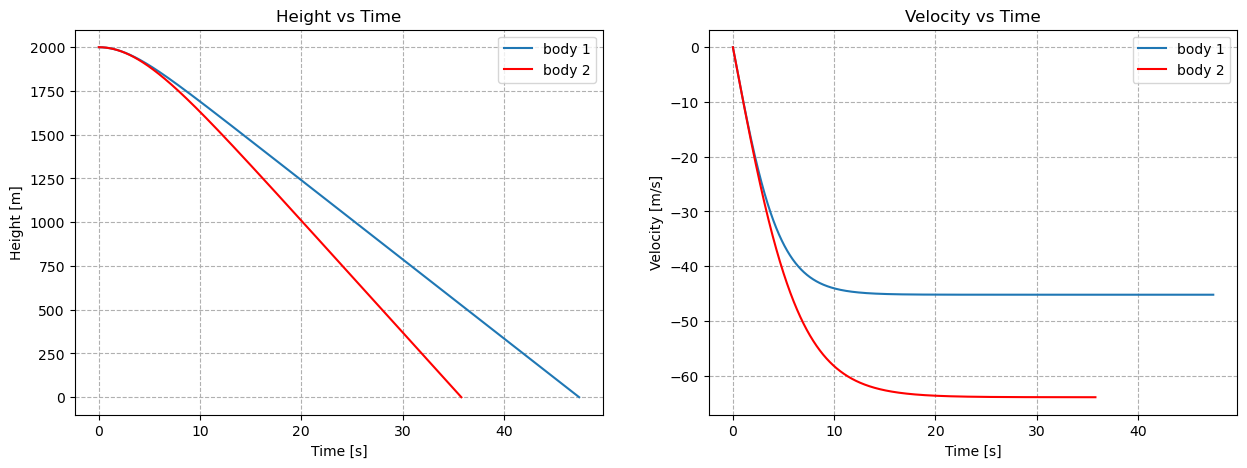

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(time_log1, height_log1)
ax[0].plot(time_log2, height_log2, color='red')
ax[0].set_title('Height vs Time')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Height [m]')
ax[0].grid(linestyle='--')
ax[0].legend(('body 1', 'body 2'))
ax[1].plot(time_log1, v_y_log1)
ax[1].plot(time_log2, v_y_log2, color='red')
ax[1].set_title('Velocity vs Time')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Velocity [m/s]')
ax[1].grid(linestyle='--')
ax[1].legend(('body 1', 'body 2'))
plt.show()